[View in Colaboratory](https://colab.research.google.com/github/costa-la-costa/NeuroNet/blob/master/Simple_NeuroNet.ipynb)

# Пишем простейшую нейронную сеть.


[Подробное описание здесьt](https://proglib.io/p/neural-nets-guide/)

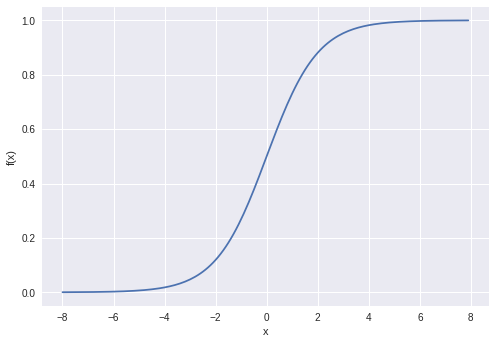

In [1]:
import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

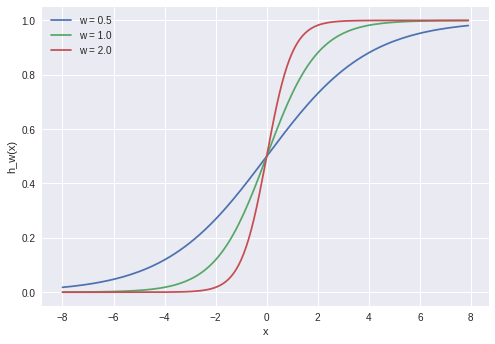

In [2]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
  f = 1 / (1 + np.exp(-x * w))
  plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc = 2)
plt.show()

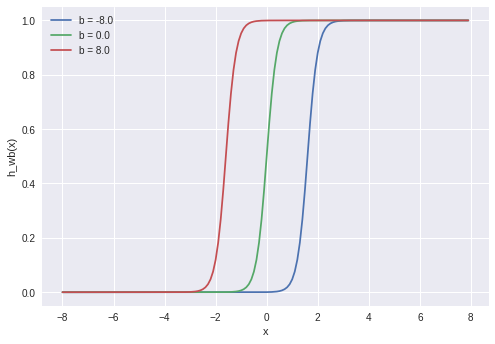

In [3]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
  f = 1 / (1 + np.exp(-(x * w + b)))
  plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc = 2)
plt.show()

In [4]:
# Присвоим некоторые рандомные числовые значения весу каждой связи с W1
w1 = np.array([
  [0.2, 0.2, 0.2],
  [0.4, 0.4, 0.4],
  [0.6, 0.6, 0.6]
])

# Аналогично можно сделать и с W2
w2 = np.zeros((1, 3))
w2[0, : ] = np.array([0.5, 0.5, 0.5])
#w2 = np.array([0.5, 0.5, 0.5])
print (w2)
#Мы можем присвоить некоторые значения весу смещения в 1 и 2 слое
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

def f(x): #пишем отдельную активационную функцию
   return 1 / (1 + np.exp(-x))

[[0.5 0.5 0.5]]


In [0]:
def simple_looped_nn_calc(n_layers, x, w, b):
#Данная функция принимает в качестве входа номер слоя в нейронной сети, х — входной массив / вектор
#Функция сначала проверяет, чем является входной массив для соответствующего слоя с узлами / весами
#Если рассматривается первый слой, то входом для второго слоя является входной массив, умноженный на соответствующие веса
#Если слой не первый, то входом для последующего будет выход предыдущего
  for l in range(n_layers - 1): # Формируется входной массив - перемножения весов в каждом слое
    if l == 0:
      node_in = x # Если это первый слой, то входной массив равен вектору х
    else : # Если слой не первый, вход для текущего слоя равен выходу предыдущего
      node_in = h #формирует выходной массив для узлов в слое l + 1      
    h = np.zeros((w[l].shape[0], ))#проходит по строкам массива весов
    for i in range(w[l].shape[0]): #считает сумму внутри активационной функции
      f_sum = 0 #проходит по столбцам массива весов
      for j in range(w[l].shape[1]):
        f_sum += w[l][i][j] * node_in[j] #добавляет смещение
      f_sum += b[l][i]
      h[i] = f(f_sum)
#использует активационную функцию для расчета  i-го выхода
#в данном случае h1, h2, h3
  
  return h

In [0]:
w = [w1, w2]
b = [b1, b2]
#Рандомный входной вектор x
x = [1.5, 2.0, 3.0]

Функция сначала проверяет, чем является входной массив для соответствующего слоя с узлами / весами. Если рассматривается первый слой, то входом для второго слоя является входной массив X, умноженный на соответствующие веса. Если слой не первый, то входом для последующего будет выход предыдущего.

In [7]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

Использование циклов — не самый эффективный способ расчета прямого распространения на языке Python , потому что циклы в этом языке программирования работают довольно медленно. В данном случае процесс прямого распространения с циклами занимает около 40 микросекунд. Это довольно быстро, но не для больших нейронных сетей с > 100 узлами на каждом слое, особенно при их обучении. Если мы запустим этот алгоритм на нейронной сети с четырьмя слоями, то получим результат 70 микросекунд. Эта разница является достаточно значительной.

In [8]:
%timeit simple_looped_nn_calc(3, x, w, b)

10000 loops, best of 3: 22.5 µs per loop


Можно более компактно написать предыдущие уравнения, тем самым найти результат эффективнее. 

В матричном виде перемножим нужные элементы
![alt text](https://proglib.io/wp-content/uploads/2017/07/3.5.jpg)

Каждая строка полученного вектора соответствует аргументу активационной функции в оригинальной НЕ матричной системе уравнений выше. Это означает, что в Python мы можем реализовать все, не используя медленные циклы. К счастью, библиотека numpy дает возможность сделать это достаточно быстро, благодаря функциям-операторам над матрицами.

z(l+1)=W(l)h(l)+b(l)

In [0]:
def matrix_feed_forward_calc(n_layers, x, w, b):
  for l in range(n_layers - 1):
    if l == 0:
      node_in = x
    else :
      node_in = h
    z = w[l].dot(node_in) + b[l]
    h = f(z)
  return h

Если сравнить время работы этой функции с предыдущей на простой сети с четырьмя слоями, то мы получим результат лишь на 24 микросекунды меньше. Но если увеличить количество узлов в каждом слое до 100-100-50-10, то мы получим гораздо большую разницу. Функция с циклами в этом случае дает результат 41 миллисекунду, когда у функции с векторизацией это занимает лишь 84 микросекунды. Также существуют еще более эффективные реализации операций над матрицами, которые используют пакеты глубинного обучения, такие как TensorFlow и Theano.

In [10]:
#Ппример простой имплементации градиентного спуска для нахождения минимума функции f(x)=x4-3x3+2 на языке Python
#Градиент этой функции можно найти аналитически через производную f»(x)=4x3-9x2.
x_new = 6 # Алгоритм начинается с x = 6
gamma = 0.01 # Размер шага
precision = 0.00001 # Точность
 
def df(x):
  y = 4 * x**3 - 9 * x**2
  return y

x_old = x_new
x_new += -gamma * df(x_old)
  
while abs(x_new - x_old) > precision:
  x_old = x_new
  x_new += -gamma * df(x_old)
 
print("Локальный минимум находится на %f"  % x_new)

Локальный минимум находится на 2.249965


определению метода обратного распространения через градиентный спуск для обучения наших нейронных сетей. Финальный алгоритм обратного распространения выглядит следующим образом:
Рандомная инициализация веса для каждого слоя W(l). Когда итерация < границы итерации:

01. Зададим ΔW и Δb начальное значение ноль
02. Для экземпляров от 1 до m:

а. Запустите процесс прямого распространения через все nl слоев. Храните вывод активационной функции в h(l)

б. Найдите значение δ( nl) выходного слоя. Обновите ΔW(l)и Δb( l ) для каждого слоя
03. Запустите процесс градиентного спуска, используя:

![alt text](https://proglib.io/wp-content/uploads/2017/07/5.4.jpg)

Из этого алгоритма следует, что мы будем повторять градиентный спуск, пока функция оценки не достигнет минимума. На этом этапе нейросеть считается обученной и готовой к использованию.
Далее мы попробуем реализовать этот алгоритм на языке программирования для обучения нейронной сети распознаванию чисел, написанных от руки.

Напишем код, который прогнозирует, основываясь на данных MNIST. База данных MNIST — это набор примеров в нейронных сетях и глубинном обучении. Она включает в себя изображения цифр, написанных от руки, с соответствующими ярлыками, которые объясняют, что это за число. Каждое изображение размером 8х8 пикселей. В этом примере мы используем сети данных MNIST для библиотеки машинного обучения scikit learn в языке программирования Python . Пример такого изображения можно увидеть под кодом:

(1797, 64)


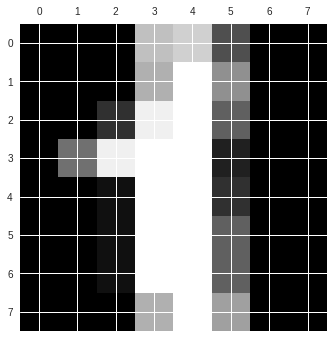

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

Код, который мы собираемся написать в нашей нейронной сети, будет анализировать цифры, которые изображают пиксели на изображении. Для начала, нам нужно отсортировать входные данные. Для этого мы сделаем две следующие вещи:

01. Масштабировать данные
02. Разделить данные на тесты и учебные тесты

In [12]:
# рассмотрим представление пикселей одного из сетов данных:
digits.data[0, : ]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Заметили ли вы, что входные данные меняются в интервале от 0 до 15? Достаточно распространенной практикой является масштабирование входных данных так, чтобы они были только в интервале от [0, 1], или [1, 1]. Это делается для более легкого сравнения различных типов данных в нейронной сети. Масштабирование данных можно легко сделать через библиотеку машинного обучения scikit learn:

In [13]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

Стандартный инструмент масштабирования в scikit learn нормализует данные через вычитание и деление. Вы можете видеть, что теперь все данные находятся в интервале от -2 до 2.

набор данных разбивают на учебные наборы и тестовые наборы. Учебный набором данных, на которых модель будет учиться, а тестовый набор — это данные, на которых модель будет тестироваться после завершения обучения. Количество учебных данных должно быть всегда больше тестовых данных. Обычно они занимают 60-80% от набора данных.
Опять же, scikit learn легко разбивает данные на учебные и тестовые наборы:

In [0]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

В этом случае мы выделили 40% данных на тестовые наборы и 60% соответственно на обучение. Функция train_test_split в scikit learn добавляет данные рандомно в различные базы данных — то есть, функция не берет первые 60% строк для учебного набора, а то, что осталось, использует как тестовый.

Для того, чтобы получать результат — числа от 0 до 9, нам нужен выходной слой. Более-менее точная нейросеть, как правило, имеет выходной слой с 10 узлами, каждый из которых выдает число от 0 до 9. Мы хотим научить сеть так, чтобы, например, при цифре 5 на изображении, узел с цифрой 5 в исходном слое имел наибольшее значение. В идеале, мы бы хотели иметь следующий вывод: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. Но на самом деле мы можем получить что-то похожее на это: [0.01, 0.1, 0.2, 0.05, 0.3, 0.8, 0.4, 0.03, 0.25, 0.02]. В таком случае мы можем взять крупнейших индекс в исходном массиве и считать это нашим полученным числом.
В данных MNIST нужны результаты от изображений записаны как отдельное число. Нам нужно конвертировать это единственное число в вектор, чтобы его можно было сравнивать с исходным слоем с 10 узлами. Иными словами, если результат в MNIST обозначается как «1», то нам нужно его конвертировать в вектор: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. Такую конвертацию осуществляет следующий код:

In [39]:
import numpy as np
def convert_y_to_vect(y):
  y_vect = np.zeros((len(y), 10))
  for i in range(len(y)):
    y_vect[i, y[i]] = 1
  return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

# Создаем нейросеть
Следующим шагом является создание структуры нейронной сети. Для входного слоя, мы знаем, что нам нужно 64 узла, чтобы покрыть 64 пикселей изображения. Как было сказано ранее, нам нужен выходной слой с 10 узлами. Нам также потребуется скрытый слой в нашей сети. Обычно, количество узлов в скрытых слоях не менее и не больше количества узлов во входном и выходном слоях. Объявим простой список на языке Python , который определяет структуру нашей сети:

In [0]:
nn_structure = [64, 30, 10]

Мы снова используем сигмоидальную активационную функцию, так что сначала нужно объявить эту функцию и ее производную:

In [0]:
def f(x):
    return 1 / (1 + np.exp(-x))

def f_deriv(x):
    return f(x) * (1 - f(x))

первым этапом является инициализация весов для каждого слоя. Для этого мы используем словари в языке программирования Python (обозначается через {}). Рандомные значения предоставляются весам для того, чтобы убедиться, что нейросеть будет работать правильно во время обучения. Для рандомизации мы используем random_sample из библиотеки numpy

In [0]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return delta, W, b

Следующим шагом является присвоение двум переменным ΔW и Δb нулевых начальных значений (они должны иметь такой же размер, что и матрицы весов и смещений)

In [0]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

Далее запустим процесс прямого распространения через нейронную сет

In [0]:
def feed_forward(x, W, b):
  h = {1: x}
  z = {}
  for l in range(1, len(W) + 1):
# Если первый слой, то весами является x,
# в противном случае - это выход из последнего слоя
    if l == 1:
      node_in = x
    else:
      node_in = h[l]
  z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)  
  h[l+1] = f(z[l+1])                # h^(l) = f(z^(l)) 
  return h, z

И наконец, найдем выходной слой δ (nl) и значение δ (l) в скрытых слоях для запуска обратного распространения:

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)
  
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

Теперь мы можем соединить все этапы в одну функцию.

Мы не задаем лимит работы градиентного спуска, основываясь на изменениях или точности функции оценки. Вместо этого, мы просто запускаем её с фиксированным числом итераций (3000 в нашем случае), а затем наблюдаем, как меняется общая функция оценки с прогрессом в обучении. В каждой итерации градиентного спуска, мы перебираем каждый учебный экземпляр (range (len (y)) и запускаем процесс прямого распространения, а после него и обратное распространение. Этап обратного распространения является итерацией через слои, начиная с выходного слоя к началу — range (len (nn_structure), 0, 1). Мы находим среднюю оценку на исходном слое (l == len (nn_structure)). Мы также обновляем значение ΔW и Δb с пометкой tri_W и tri_b, для каждого слоя, кроме исходного (исходный слой не имеет никакого связи, который связывает его со следующим слоем).
И наконец, после того, как мы прошлись по всем учебным экземплярам, накапливая значение tri_W и tri_b, мы запускаем градиентный спуск и меняем значения весов и смещений.

In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
  delta, W, b = setup_and_init_weights(nn_structure)
  tri_W, tri_b = init_tri_values (nn_structure)
  cnt = 0
  m = len(y)
  avg_cost_func = []
  
  print('Начало градиентного спуска для {} итераций'.format(iter_num))
  while cnt<iter_num:
# запускает градиентный спуск для весов в каждом слое
    for l in range(len(nn_structure) - 1, 0, -1):
      delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
      tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) 
      tri_b[l] += delta[l+1]
      W[l] += -alpha * (1.0/m * tri_W[l])
      b[l] += -alpha * (1.0/m * tri_b[l])
# завершает расчеты общей оценки
    avg_cost = 1.0/m * avg_cost
    avg_cost_func.append(avg_cost)
    cnt += 1
  return W, b, avg_cost_func

In [42]:
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

plt.plot(avg_cost_func)
plt.ylabel('Средняя J')
plt.xlabel('Количество итераций')
plt.show()

Начало градиентного спуска для 3000 итераций


KeyError: ignored

In [0]:
# Оценка точности модели
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

Мы можем оценить точность результата (процент раз, когда сеть выдала правильный результат), используя функцию accuracy_score из библиотеки scikit learn

In [38]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred)*100

NameError: ignored

# Ну и сведем всё в одну прграмму:

In [0]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt


def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect


def f(x):
    return 1 / (1 + np.exp(-x))


def f_deriv(x):
    return f(x) * (1 - f(x))


def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b


def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b


def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, otherwise,
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l))
    return h, z


def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)


def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis]))
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y


if __name__ == "__main__":
    # load data and scale
    digits = load_digits()
    X_scale = StandardScaler()
    X = X_scale.fit_transform(digits.data)
    y = digits.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # convert digits to vectors
    y_v_train = convert_y_to_vect(y_train)
    y_v_test = convert_y_to_vect(y_test)
    # setup the NN structure
    nn_structure = [64, 30, 10]
    # train the NN
    W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)
    # plot the avg_cost_func
    plt.plot(avg_cost_func)
    plt.ylabel('Average J')
    plt.xlabel('Iteration number')
    plt.show()
    # get the prediction accuracy and print
    y_pred = predict_y(W, b, X_test, 3)
    print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))